<a href="https://colab.research.google.com/github/tanu26062006/Assignment-_1/blob/main/Employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-2821525200.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1-2821525200.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Training Random Forest Regressor Model...
Random Forest Regressor Model Trained.

--- Random Forest Regressor Model Evaluation ---
Mean Absolute Error (MAE): $10,815.33
Mean Squared Error (MSE): $310,070,366.67
Root Mean Squared Error (RMSE): $17,608.82
R-squared (R2): 0.8720


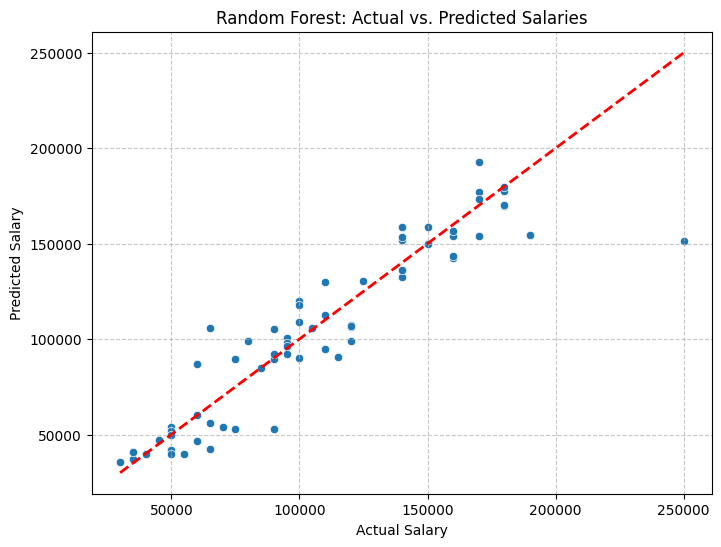


New employee data for prediction:
    Age  Gender Education Level       Job Title  Years of Experience
0   35  Female        Master's  Data Scientist                    8

Predicted Salary for the new employee: $94,050.00


In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Salary Data.csv')

# --- 1. Data Preprocessing: Handle Missing Values ---
# Impute numerical columns with the median
for col in ['Age', 'Years of Experience', 'Salary']:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical columns with the mode
for col in ['Gender', 'Education Level', 'Job Title']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# --- 2. Separate Features (X) and Target (y) ---
X = df.drop(columns=['Salary'])
y = df['Salary']

# --- 3. Identify Categorical and Numerical Features ---
categorical_features = ['Gender', 'Education Level', 'Job Title']
numerical_features = ['Age', 'Years of Experience']

# --- 4. Create a Column Transformer for Preprocessing ---
# This will apply StandardScaler to numerical features and OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) as they are
)

# --- 5. Split the Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 6. Apply Preprocessing to Training and Testing Data ---
# Fit the preprocessor on the training data and transform both training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- 7. Model Selection and Training (Random Forest Regressor) ---
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available CPU cores
print("Training Random Forest Regressor Model...")
rf_model.fit(X_train_processed, y_train)
print("Random Forest Regressor Model Trained.")

# --- 8. Model Evaluation ---
# Make predictions on the preprocessed test set
y_pred_rf = rf_model.predict(X_test_processed)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae_rf:,.2f}")
print(f"Mean Squared Error (MSE): ${mse_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_rf:,.2f}")
print(f"R-squared (R2): {r2_rf:.4f}")

# --- 9. Plotting Actual vs. Predicted Salaries ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.title('Random Forest: Actual vs. Predicted Salaries')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('actual_vs_predicted_salaries_replot.png') # Save the plot
plt.show()

# --- 10. Prediction with New Data ---
# Create a sample new employee data point
new_employee_data = pd.DataFrame([{
    'Age': 35,
    'Gender': 'Female',
    'Education Level': "Master's",
    'Job Title': 'Data Scientist',
    'Years of Experience': 8
}])

print("\nNew employee data for prediction:\n", new_employee_data)

# Preprocess the new data using the *fitted* preprocessor
new_employee_processed = preprocessor.transform(new_employee_data)

# Predict salary for the new employee
predicted_salary = rf_model.predict(new_employee_processed)

print(f"\nPredicted Salary for the new employee: ${predicted_salary[0]:,.2f}")